# 분류분석(Classification)
***

#### 분류기법
- 회귀분석, 로지스틱회귀분석
- 의사결정나무
- 베이지안 분류
- 인공신경망
- 지지도벡터기계
- k-최근접 이웃
- 규칙기반의 분류와 사례기반추론

## 1. 성과분석

### 1-1) 혼동행렬(Confusion Matrix)
|구분||실제|실제|
|---|---|---|---|
|||Positive|Negative||
|예측|positive|TP|FP|
|예측|negative|FN|TN|

#### - 정학도(Accuracy) : $(TN + TP)\over(TN + TP + FN +FP)$
#### - 오분류율(Error Rate) : 1 - $Accuracy$ = $(FN + FP)\over (TN + TP + FN +FP)$
#### - 특이도(Specificity) : $TN\over(TN+FP)$ = TNR(True Negtative Rate)
#### - 민감도(Sensitivity) : $TP\over(TP+FN)$ = TPR(True Positive Rate)
#### - 정확도(Precision) : $TP\over(TP+FP)$
#### - 재현율(Recall) : 민감도와 같음
#### - F1 Score = 2 * $Precision * Recall \over Precision + Recall$
***
### 1-2) ROCR 성과분석
#### ROC Curve(Receiver Operating Characteristic Curve)
- ROC Curve란 가로축을 **FPR(1 - 특이도)**로 두고 세로축을 **TPR** 값으로 두어 시각화한 그래프이다.
- 그래프가 왼쪽 상단에 가깝게 그려질수록 올바르게 예측한 비율은 높고 잘못 예측한 비율은 낮음을 의미한다.
- ROC 곡선 아래의 면적을 의미하는 **AUROC(Area Under ROC)** 값이 크면 클수록 모형의 성능이 좋다고 평가한다.

|기준|구분|
|---|---|
|0.9 ~ 1.0|Excellent|
|0.8 ~ 0.9|Good|
|0.7 ~ 0.8|Fair|
|0.6 ~ 0.7|Poor|
|0.5 ~ 0.6|Fail|
***

### 1-3) 이익 도표(Lift Chart)
- 분류된 관측치에 대해 예측의 정확성을 나타내기 위해 임의로 나눈 각 등급별로 반응검출율, 반응률, 리프트 등의 정보를 산출하여 나타내는 도표.

< 과정 >
- 1. 관측치별로 예측활률을 내림차순으로 정렬한다.
- 2. 데이터를 n개 구간으로 나눈 다음 각 구간의 반응율(% response)을 산출한다.
- 3. 기본 향상도에 비해 반응률이 몇 배나 높은지를 계산하는데 이것을 향상도라고 한다.


- 이익도표의 각 등급은 예측확률에 따라 매겨진 순위로 상위 등급에서는 더 높은 반응률을 보이는 것이 좋은 모형이다.
- 등급별로 향상도가 급격하게 변동할수록 좋은 모형이며 각 등급별로 향상도가 들쭉날쭉하면 좋은 모형이라고 볼 수 없다.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
from sklearn.metrics import accuracy_score, auc, f1_score, roc_curve, roc_auc_score, recall_score, precision_score,classification_report,confusion_matrix,log_loss,multilabel_confusion_matrix,plot_confusion_matrix,plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import StratifiedKFold, train_test_split

In [3]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Binary Classification

In [125]:
X = pd.read_csv('/Users/kisehyun/kookmin/data_mining/X_train_competition.csv', encoding = 'cp949')
y = pd.read_csv('/Users/kisehyun/kookmin/data_mining/y_train.csv')

In [126]:
X.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,매장이용다양성,이용지점다양성,내점일수,수입상품_구매비율,주말방문비율,...,sales_date,평균할인금액,평균구매시간,실제구매금액,실제구매금액평균,무역점,본점,신촌점,천호점,평균할인율
0,0,1742000,11,158363.636,2.8,0.0037,0.50,7,63.6,42.9,...,5.557692,15836.4,1757.1,1567800,142527.3,5,6,0,0,10.000023
1,1,2772100,26,106619.231,2.5,0.0100,0.50,16,42.3,50.0,...,6.750000,2178.1,1531.2,2715470,104441.2,4,22,0,0,2.042877
2,2,3750850,11,340986.364,3.5,0.0037,0.50,7,9.1,28.6,...,2.500000,23190.0,1537.1,3495760,317796.4,8,0,0,3,6.800858
3,3,2300500,30,76683.333,2.7,0.0110,0.50,13,0.0,38.5,...,6.384615,3055.3,1604.1,2208840,73628.0,4,0,0,26,3.984308
4,4,1045000,4,261250.000,4.5,0.0021,0.25,2,25.0,50.0,...,0.076923,5450.0,1434.0,1023200,255800.0,4,0,0,0,2.086124


In [127]:
y.head()

,custid,gender
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0


In [128]:
X = X.iloc[:, 1:]

#### 파생변수 생성 파트는 생략

In [129]:
dt = DecisionTreeClassifier(random_state = 526)
rf = RandomForestClassifier(random_state = 526)
svm = SVC(random_state = 526)
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier(random_state = 526)

#### 평가지표 출력

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y.gender, test_size = .2, random_state = 526)

In [131]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=526)

In [132]:
pred_class = gb.predict(X_test)

#### 아래 지표들은 데이터의 예측 클래스로 계산

In [133]:
print(f'Accuracy : {accuracy_score(y_test, pred_class)}')
print(f'Error Rate : {1 - accuracy_score(y_test, pred_class)}')
print(f'Recall : {recall_score(y_test, pred_class)}')
print(f'Precision : {precision_score(y_test, pred_class)}')
print(f'F1-score : {f1_score(y_test, pred_class)}')

Accuracy : 0.7065
Error Rate : 0.2935
Recall : 0.12316874660879001
Precision : 0.6102150537634409
F1-score : 0.2049661399548533


In [134]:
print(confusion_matrix(y_test, pred_class))

[[4012  145]
 [1616  227]]


In [135]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      4157
           1       0.61      0.12      0.20      1843

    accuracy                           0.71      6000
   macro avg       0.66      0.54      0.51      6000
weighted avg       0.68      0.71      0.63      6000



#### 아래 지표들은 데이터의 클래스별 예측 확률로 계산

In [136]:
prob_class = gb.predict_proba(X_test)[:, 1]

In [ ]:
관측치별로 예측활률을 내림차순으로 정렬한다.
데이터를 n개 구간으로 나눈 다음 각 구간의 반응율(% response)을 산출한다.
기본 향상도에 비해 반응률이 몇 배나 높은지를 계산하는데 이것을 향상도라고 한다.
이익도표의 각 등급은 예측b확률에 따라 매겨진 순위로 상위 등급에서는 더 높은 반응률을 보이는 것이 좋은 모형이다.
등급별로 향상도가 급격하게 변동할수록 좋은 모형이며 각 등급별로 향상도가 들쭉날쭉하면 좋은 모형이라고 볼 수 없다.

In [149]:
X_test['probability'] = prob_class

<ipython-input-149-982fccadd269>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['probability'] = prob_class


In [31]:
fpr, tpr, thresholds = roc_curve(y_test, prob_class)

In [38]:
auc(fpr, tpr) # roc auc와 동일

0.655170282630309

In [37]:
print(f'roc auc : {roc_auc_score(y_test, prob_class)}')
print(f'Log loss : {log_loss(y_test, prob_class)}')

roc auc : 0.655170282630309
Log loss : 0.582606028479089


#### 이익도표(Lift Chart)

In [174]:
X_test['actual_class'] = y_test

<ipython-input-174-5cdb4852a7e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['actual_class'] = y_test


In [190]:
df = X_test.sort_values(by = 'probability', ascending = False)
df.head()

,총구매액,구매건수,평균구매가격,평균할부개월수,매장이용다양성,이용지점다양성,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,...,평균구매시간,실제구매금액,실제구매금액평균,무역점,본점,신촌점,천호점,평균할인율,probability,actual_class
22111,17419300,51,341554.902,2.3,0.0136,0.50,18,27.5,72.2,16,...,1487.7,15720550,308246.1,12,39,0,0,9.752107,0.843076,1
6494,12069110,171,70579.591,1.2,0.0393,1.00,45,2.9,64.4,43,...,1538.0,11241070,65737.3,7,60,99,5,6.860765,0.839064,1
8409,10803900,40,270097.500,1.2,0.0131,0.50,19,10.0,73.7,19,...,1465.5,9748870,243721.8,2,38,0,0,9.765288,0.824685,0
1204,20325401,435,46725.060,1.0,0.0456,0.25,165,0.9,29.7,97,...,1659.9,19800421,45518.2,0,0,435,0,2.582982,0.815114,1
12828,30512209,189,161440.259,2.0,0.0409,0.75,94,28.6,29.8,58,...,1555.2,28189589,149151.3,9,65,115,0,7.612104,0.812746,1


In [191]:
df['cls'] = pd.qcut(df.probability, 10, labels = [f'{i}등급' for i in range(10, 0, -1)])

In [192]:
df.cls.value_counts()

10등급    600
9등급     600
8등급     600
7등급     600
6등급     600
5등급     600
4등급     600
3등급     600
2등급     600
1등급     600
Name: cls, dtype: int64

한 구간에 600개씩 10등급으로 구간화 진행

In [214]:
pd.crosstab(df.cls, df.actual_class).iloc[:, 1].sum()
# 실제 class가 1인 고객의 수

1843

In [216]:
baseline_lift = pd.crosstab(df.cls, df.actual_class).iloc[:, 1].sum() / 6000
baseline_lift

0.30716666666666664

In [220]:
lift_df = pd.DataFrame((pd.crosstab(df.cls, df.actual_class).iloc[:, 1] / y_test.value_counts()[1]))
lift_df.rename(columns = {1 : 'Captured_Response'}, inplace = True)
lift_df['Response'] = pd.crosstab(df.cls, df.actual_class).iloc[:, 1] / 600
lift_df['Lift'] = lift_df.Response / baseline_lift
lift_df *= 100
lift_df.sort_index(ascending = False)

,Captured_Response,Response,Lift
cls,,,
1등급,18.231145,56.000000,182.311449
2등급,12.913728,39.666667,129.137276
3등급,12.696690,39.000000,126.966902
4등급,10.797613,33.166667,107.976126
5등급,10.472056,32.166667,104.720564
6등급,9.983722,30.666667,99.837222
7등급,6.890939,21.166667,68.909387
8등급,7.596310,23.333333,75.963104
9등급,6.077048,18.666667,60.770483


- Captured Response  : 반응검출율(해당 등급의 class 1 / 전체 데이터 수)
- Response : 반응률(해당 등급의 class 1 / 등급 데이터 수)
- Lift : 반응률(빠른 속도로 Lift가 감소해야 좋은 모델)

### Auto Plotting by test set & Model

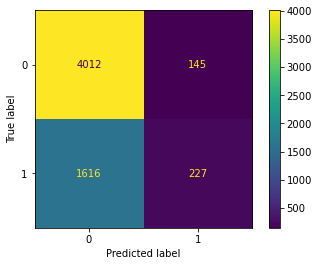

In [51]:
plot_confusion_matrix(gb, X_test, y_test)
plt.show()

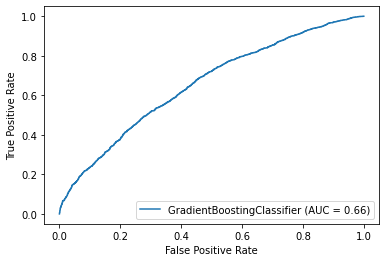

In [48]:
plot_roc_curve(gb, X_test, y_test)
plt.show()

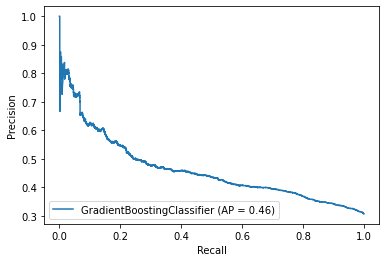

In [56]:
plot_precision_recall_curve(gb, X_test, y_test)
plt.show()

#### submission 제출 문제 -> 분류문제는 StratifiedKFold
- 3개 이상의 알고리즘을 적용하여 제출 파일 생성하라.

In [58]:
n = 10
skf = StratifiedKFold(n_splits = n, random_state = 526, shuffle = True)

#### 의사결정나무

In [62]:
i = 0
### test 파일의 행수만큼 0행렬 생성
# dt_pred = np.zeros((test.shape[0]))

for tr_idx, val_idx in skf.split(X, y.gender) :
    tr_x, tr_y = X.iloc[tr_idx], y.gender.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.gender.iloc[val_idx]
    i += 1
    dt.fit(tr_x, tr_y)
    
    pred = dt.predict_proba(val_x)[:, 1]
    print(f'{i}번째 FOLD roc_auc_score는 {roc_auc_score(val_y, pred)}')
    
    ### 실제 test 파일 존재하면 아래와 같이 실행
    # sub_pred = dt.predict_proba(test)[:, 1] / n
    # dt_pred += sub_pred

1번째 FOLD roc_auc_score는 0.5284142468239564
2번째 FOLD roc_auc_score는 0.5482078039927405
3번째 FOLD roc_auc_score는 0.5237573099415205
4번째 FOLD roc_auc_score는 0.5284520568663037
5번째 FOLD roc_auc_score는 0.5458194696511394
6번째 FOLD roc_auc_score는 0.5369656180681589
7번째 FOLD roc_auc_score는 0.5336068259729784
8번째 FOLD roc_auc_score는 0.5207388082274652
9번째 FOLD roc_auc_score는 0.544050982644441
10번째 FOLD roc_auc_score는 0.5271481110348021


#### KNN

In [63]:
i = 0
### test 파일의 행수만큼 0행렬 생성
# knn_pred = np.zeros((test.shape[0]))

for tr_idx, val_idx in skf.split(X, y.gender) :
    tr_x, tr_y = X.iloc[tr_idx], y.gender.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.gender.iloc[val_idx]
    i += 1
    knn.fit(tr_x, tr_y)
    
    pred = knn.predict_proba(val_x)[:, 1]
    print(f'{i}번째 FOLD roc_auc_score는 {roc_auc_score(val_y, pred)}')
    
    ### 실제 test 파일 존재하면 아래와 같이 실행
    # sub_pred = knn.predict_proba(test)[:, 1] / n
    # knn_pred += sub_pred

1번째 FOLD roc_auc_score는 0.5479649269846071
2번째 FOLD roc_auc_score는 0.5457007881293272
3번째 FOLD roc_auc_score는 0.5505958757646031
4번째 FOLD roc_auc_score는 0.5430257276332594
5번째 FOLD roc_auc_score는 0.5330654071721449
6번째 FOLD roc_auc_score는 0.5535484724742892
7번째 FOLD roc_auc_score는 0.5151347822981784
8번째 FOLD roc_auc_score는 0.5301626987127781
9번째 FOLD roc_auc_score는 0.5608708309008718
10번째 FOLD roc_auc_score는 0.5425838864282566


#### 랜덤포레스트

In [65]:
i = 0
### test 파일의 행수만큼 0행렬 생성
# rf_pred = np.zeros((test.shape[0]))

for tr_idx, val_idx in skf.split(X, y.gender) :
    tr_x, tr_y = X.iloc[tr_idx], y.gender.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.gender.iloc[val_idx]
    i += 1
    rf.fit(tr_x, tr_y)
    
    pred = rf.predict_proba(val_x)[:, 1]
    print(f'{i}번째 FOLD roc_auc_score는 {roc_auc_score(val_y, pred)}')
    
    ### 실제 test 파일 존재하면 아래와 같이 실행
    # sub_pred = rf.predict_proba(test)[:, 1] / n
    # rf_pred += sub_pred

1번째 FOLD roc_auc_score는 0.6317501428379376
2번째 FOLD roc_auc_score는 0.6333814886233784
3번째 FOLD roc_auc_score는 0.6293444788935941
4번째 FOLD roc_auc_score는 0.6293557693923506
5번째 FOLD roc_auc_score는 0.6468213832593936
6번째 FOLD roc_auc_score는 0.6422082955232911
7번째 FOLD roc_auc_score는 0.62268964887074
8번째 FOLD roc_auc_score는 0.618531594491497
9번째 FOLD roc_auc_score는 0.6305221695998957
10번째 FOLD roc_auc_score는 0.6470356721922736


In [66]:
#### submission = (dt_pred + knn_pred + rf_pred) / 3

## Multi Class Classification

In [69]:
data = pd.read_csv('/Users/kisehyun/Competition/데이콘_신용카드_사용자연체예측/train.csv', encoding = 'cp949').iloc[:, 1:]

In [70]:
data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [73]:
X = data.iloc[:, :-1]
y = data.credit

In [74]:
X = pd.get_dummies(columns = X.columns[X.dtypes == object], data = X)

In [75]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = .2, random_state = 526)

In [76]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=526)

In [104]:
pred = gb.predict(X_test)

In [105]:
print(f'Accuracy : {accuracy_score(y_test, pred)}')
print(f'Error Rate : {1 - accuracy_score(y_test, pred)}')
print(f'Recall : {recall_score(y_test, pred, average = "micro")}')
print(f'Precision : {precision_score(y_test, pred, average = "macro")}')
print(f'F1-score : {f1_score(y_test, pred, average = "macro")}')

Accuracy : 0.6872637944066515
Error Rate : 0.31273620559334847
Recall : 0.6872637944066515
Precision : 0.46825723296311533
F1-score : 0.3905678215630172


In [106]:
f1_score(y_test, pred, average = None)

array([0.        , 0.36246334, 0.80924012])

In [111]:
print(f1_score(y_test, pred, average = 'micro')) # 전체 데이터를 대상으로 전역적으로 계산됨
print(f1_score(y_test, pred, average = 'macro')) # 각 클래스별 계산 
print(f1_score(y_test, pred, average = 'weighted')) # 

0.6872637944066515
0.3905678215630172
0.6016586838023114


In [89]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       653
         1.0       0.72      0.24      0.36      1276
         2.0       0.68      0.99      0.81      3363

    accuracy                           0.69      5292
   macro avg       0.47      0.41      0.39      5292
weighted avg       0.61      0.69      0.60      5292



In [83]:
print(multilabel_confusion_matrix(y_test, pred, labels = [0, 1, 2]))

[[[4638    1]
  [ 653    0]]

 [[3896  120]
  [ 967  309]]

 [[ 395 1534]
  [  35 3328]]]


In [122]:
pred = gb.predict_proba(X_test)

In [120]:
print(log_loss(y_test ,pred))
print(roc_auc_score(y_test, pred, average = 'macro', multi_class = 'ovo')) # 각 클래스별 계산 
# ovo = One vs one
# ovr = One vs rest

0.8004842205416338
0.6284750759430278
